In [21]:
import pandas as pd
import matplotlib.pyplot as plt
x=pd.read_csv("C:/Users/User/Desktop/New folder/Decision Tree + Random Forest + Ensemble Techniques/admission.csv")
df=pd.DataFrame(x)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [23]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [24]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [25]:
df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
64,65,325,111,3,3.0,3.5,8.70,0,0.52
19,20,303,102,3,3.5,3.0,8.50,0,0.62
123,124,308,108,3,3.5,3.5,8.22,0,0.61
427,428,310,101,3,3.5,5.0,8.65,1,0.71
265,266,313,102,3,2.5,2.5,8.68,0,0.71
270,271,306,105,2,2.5,3.0,8.22,1,0.72
347,348,299,94,1,1.0,1.0,7.34,0,0.42
108,109,331,116,5,5.0,5.0,9.38,1,0.93
291,292,300,102,2,1.5,2.0,7.87,0,0.56
490,491,307,105,2,2.5,4.5,8.12,1,0.67


In [26]:
df.shape

(500, 9)

In [27]:
df.corr().style.background_gradient(cmap="coolwarm")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [28]:
df['GRE Score'].min()

290

In [29]:
df['GRE Score'].max()

340

In [30]:
df['University Rating'] / df['University Rating'].sum()* 100

0      0.256904
1      0.256904
2      0.192678
3      0.192678
4      0.128452
         ...   
495    0.321130
496    0.321130
497    0.321130
498    0.256904
499    0.256904
Name: University Rating, Length: 500, dtype: float64

In [31]:
for i in df['Chance of Admit ']:
    if i<0.80:
        df.replace(to_replace =i,value =0,inplace=True)
    else:
        df.replace(to_replace =i,value =1,inplace=True)

In [32]:
df["Chance of Admit "]

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
495    1.0
496    1.0
497    1.0
498    0.0
499    1.0
Name: Chance of Admit , Length: 500, dtype: float64

In [33]:
x=df[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']]


In [35]:
y=df['Chance of Admit ']

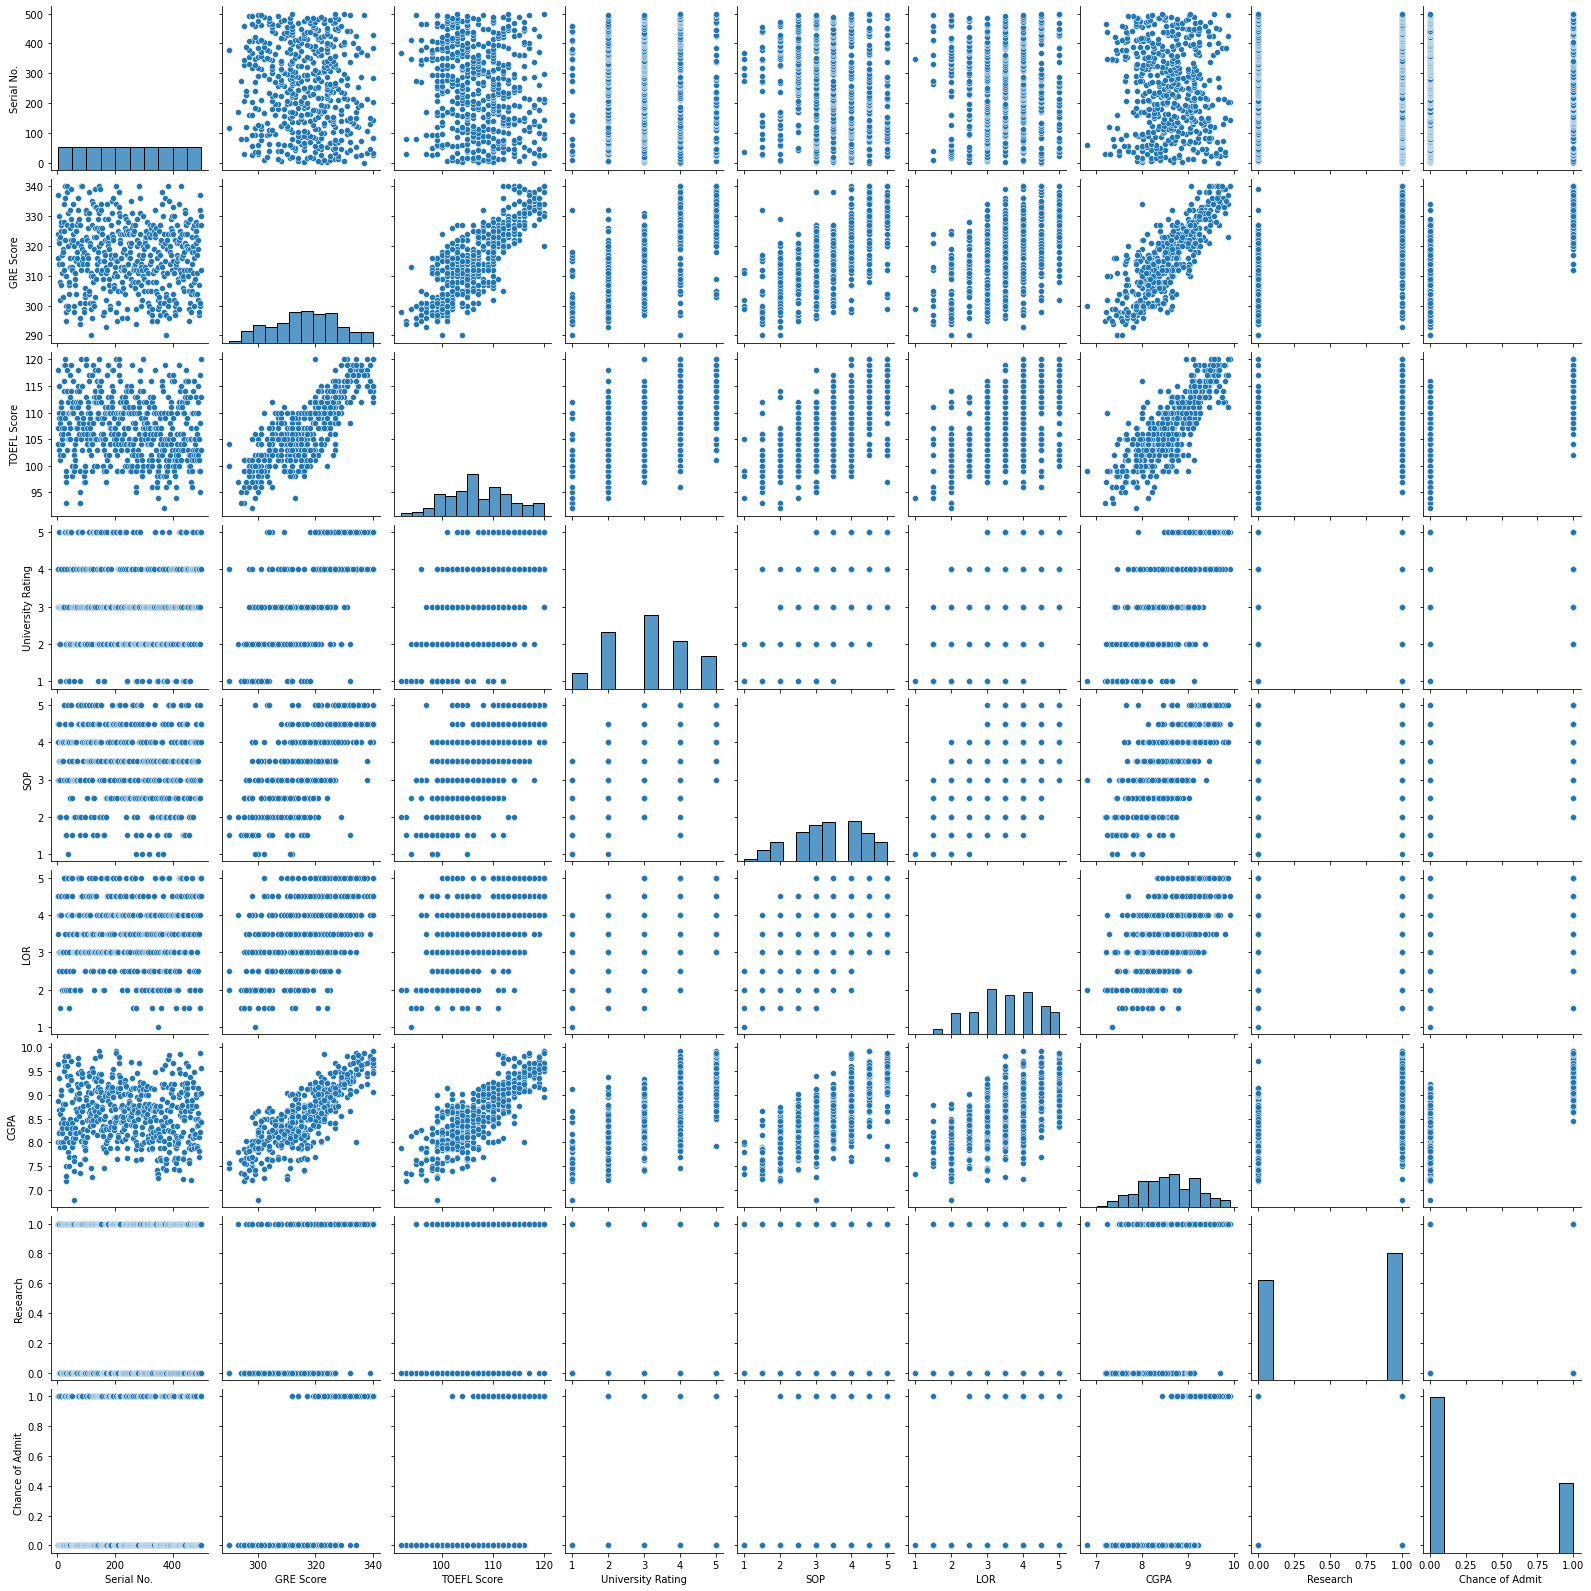

In [34]:
import seaborn as sns
sns.pairplot(df)

In [36]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred=model.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred)

0.9066666666666666

In [40]:
sc = StandardScaler()

In [43]:
pca = decomposition.PCA()   

In [44]:
decisiontree = tree.DecisionTreeClassifier()

In [45]:
pipe = Pipeline(steps=[('sc', sc), 
                       ('pca', pca),
                       ('decisiontree', decisiontree)])

In [46]:
n_components = list(range(1,x.shape[1]+1,1))

In [47]:
criterion=['gini','entropy']
max_depth=[4,6,8,12]

In [48]:
parameters=dict(pca__n_components=n_components,decisiontree__criterion=criterion,decisiontree__max_depth=max_depth)

In [49]:
clf=GridSearchCV(pipe,parameters)
clf.fit(x,y)

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                                       ('decisiontree',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontree__criterion': ['gini', 'entropy'],
                         'decisiontree__max_depth': [4, 6, 8, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8]})

In [50]:
print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])

Best Criterion: gini


In [51]:
print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])

Best max_depth: 4


In [52]:
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])

Best Number Of Components: 6


In [53]:
print(clf.best_estimator_.get_params()['decisiontree'])  

DecisionTreeClassifier(max_depth=4)


In [54]:
CV_Result = cross_val_score(clf, x, y, cv=4, n_jobs=-1)

In [55]:
print(CV_Result)

[0.872 0.888 0.84  0.888]


In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [60]:
y_pred=classifier.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9466666666666667

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_proba=classifier.predict_proba(x_test)
y_predicted=y_proba[:,1]
print(y_predicted)

[0.7 1.  0.  0.  0.8 0.  1.  0.3 0.  1.  1.  0.3 0.9 0.  0.1 0.1 0.  0.1
 0.9 0.  0.  0.  0.9 0.1 0.8 0.  0.  0.  1.  1.  0.  0.2 0.1 0.  0.  1.
 0.8 0.4 0.9 0.  0.  0.2 0.  1.  0.4 0.2 0.  0.  0.9 1.  0.5 0.  0.1 0.
 0.  0.  0.  0.  0.  0.  1.  0.9 0.5 0.  0.  1.  0.9 0.9 0.9 1.  0.  0.2
 0.  1.  0.  0.9 0.1 0.  0.  0.  0.1 0.  1.  0.4 0.7 0.3 0.3 0.  0.  0.1
 1.  1.  0.1 0.9 0.  0.  0.  0.  0.6 0.  0.  0.6 0.  0.  0.1 0.  0.1 0.
 0.  0.  1.  1.  0.  0.  1.  0.4 1.  0.1 0.1 0.9 0.8 0.  0.  1.  0.  0.
 1.  0.  0.8 0.  0.  0.  1.  0.1 0.  0.  0.2 0.  0.  0.  0.3 0.  0.  0.
 1.  0.  0.  0.  0.9 0.1]


In [64]:
fpr,tpr,threshold=roc_curve(y_test,y_predicted)

In [65]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model:",roc_auc)

Area under the curve for first model: 0.9853678929765886


Text(0.5, 0, 'false positive rate(1-specifity)')

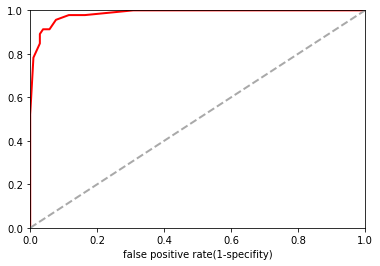

In [66]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='r',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('false positive rate(1-specifity)')
plt.xlabel('false positive rate(1-specifity)')


In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
model=AdaBoostClassifier()

In [69]:
model.fit(x_train,y_train)

AdaBoostClassifier()

In [70]:
pred=model.predict(x_test)

In [71]:
accuracy_score(y_test,pred)

0.9133333333333333